In [13]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [14]:
train_path = 'dataset/train'
valid_path = 'dataset/valid'

In [15]:
def PlotImage(img_arr):
  fig,axes = plt.subplots(1,5,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(img_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [16]:
training_datagen = ImageDataGenerator( rescale=1/255 , rotation_range=40 , width_shift_range=0.2 , height_shift_range=0.2 , shear_range=0.2 , zoom_range=0.2 , horizontal_flip=True , fill_mode='nearest' )

training_data= training_datagen.flow_from_directory(train_path , target_size=(200,200) , batch_size=128 , class_mode='binary' )

Found 3649 images belonging to 2 classes.


In [17]:
training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [18]:
valid_datagen = ImageDataGenerator( rescale=1/255)

valid_data= training_datagen.flow_from_directory(valid_path , target_size=(200,200) , batch_size=128 , class_mode='binary' )

Found 806 images belonging to 2 classes.


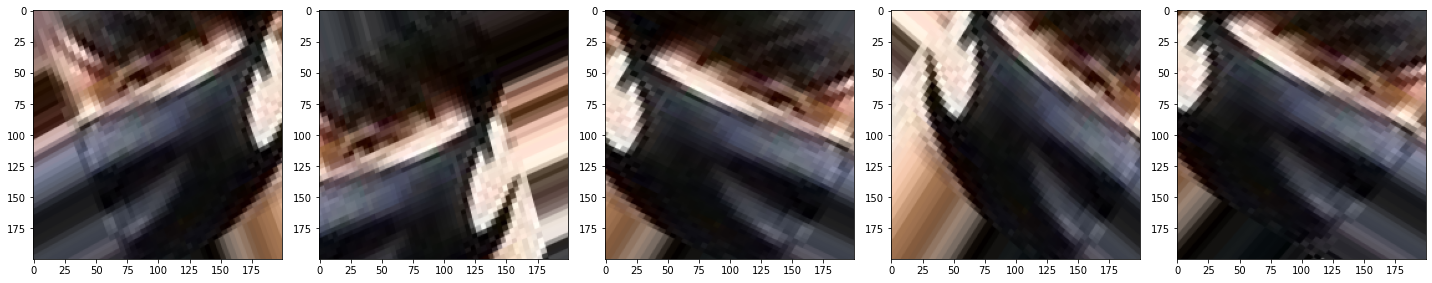

In [19]:
images = [ training_data[0][0][0] for i in range(5) ]
PlotImage(images)

In [20]:
model_save_path = 'face_mask_detection_model.h5'
checkpoint = ModelCheckpoint(model_save_path , monitor='val_accuracy' ,verbose=1 , save_best_only=True , mode='max')
callbacks_list = [checkpoint]

In [21]:
model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

In [22]:
model.compile(optimizer= 'adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 128)     

In [24]:
history = model.fit(training_data ,
                    epochs=50 , 
                    verbose=1, 
                    validation_data= valid_data , callbacks = callbacks_list )

Epoch 1/50
 1/29 [>.............................] - ETA: 3:39 - loss: 0.7352 - accuracy: 0.4219

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


29/29 [==============================] - ETA: 0s - loss: 0.7003 - accuracy: 0.6785
Epoch 1: val_accuracy improved from -inf to 0.81762, saving model to face_mask_detection_model.h5
29/29 [==============================] - 144s 5s/step - loss: 0.7003 - accuracy: 0.6785 - val_loss: 0.4307 - val_accuracy: 0.8176
Epoch 2/50
29/29 [==============================] - ETA: 0s - loss: 0.3486 - accuracy: 0.8764
Epoch 2: val_accuracy improved from 0.81762 to 0.85112, saving model to face_mask_detection_model.h5
29/29 [==============================] - 118s 4s/step - loss: 0.3486 - accuracy: 0.8764 - val_loss: 0.3510 - val_accuracy: 0.8511
Epoch 3/50
29/29 [==============================] - ETA: 0s - loss: 0.3240 - accuracy: 0.8805
Epoch 3: val_accuracy improved from 0.85112 to 0.90695, saving model to face_mask_detection_model.h5
29/29 [==============================] - 120s 4s/step - loss: 0.3240 - accuracy: 0.8805 - val_loss: 0.2674 - val_accuracy: 0.9069
Epoch 4/50
29/29 [=====================

Epoch 29/50
29/29 [==============================] - ETA: 0s - loss: 0.1412 - accuracy: 0.9488
Epoch 29: val_accuracy did not improve from 0.95409
29/29 [==============================] - 117s 4s/step - loss: 0.1412 - accuracy: 0.9488 - val_loss: 0.1464 - val_accuracy: 0.9417
Epoch 30/50
29/29 [==============================] - ETA: 0s - loss: 0.1430 - accuracy: 0.9468
Epoch 30: val_accuracy did not improve from 0.95409
29/29 [==============================] - 115s 4s/step - loss: 0.1430 - accuracy: 0.9468 - val_loss: 0.1229 - val_accuracy: 0.9516
Epoch 31/50
29/29 [==============================] - ETA: 0s - loss: 0.1537 - accuracy: 0.9455
Epoch 31: val_accuracy did not improve from 0.95409
29/29 [==============================] - 115s 4s/step - loss: 0.1537 - accuracy: 0.9455 - val_loss: 0.1477 - val_accuracy: 0.9442
Epoch 32/50
29/29 [==============================] - ETA: 0s - loss: 0.1429 - accuracy: 0.9498
Epoch 32: val_accuracy did not improve from 0.95409
29/29 [===============

In [25]:
model.save("face_mask_detection_model.h5")